In [1]:
import matplotlib.pyplot as plot
%matplotlib inline
import numpy as np
import scipy.special as sci

In [5]:
a= np.arange(6).reshape(3,2)

In [6]:
a

array([[0, 1],
       [2, 3],
       [4, 5]])

In [8]:
a[1,1]=0

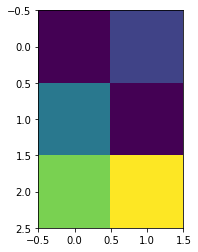

In [9]:
plot.imshow(a, interpolation="nearest")

In [10]:
class Dog:
    def bark(self):
        print("Wang, wang")

In [12]:
d= Dog()
d.bark()

Wang, wang


In [69]:
class neuralNetwork:
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        self.inodes=inputnodes
        self.hnodes=hiddennodes
        self.onodes=outputnodes
        self.lr=learningrate
        self.wih= np.random.rand(self.hnodes,self.inodes)-0.5
        self.who= np.random.rand(self.onodes, self.hnodes)-0.5
        
        #这个lambda的意思：这里复制一个function，input是x，output是sci.expit(x)，而所谓的expit(x)其实就是sigmoid function
        self.activation_function= lambda x: sci.expit(x)
        pass
    
    def train(self,inputs_list, targets_list):
        inputs= np.array(inputs_list, ndmin=2).T
        targets= np.array(targets_list,ndmin=2).T
        hidden_inputs= np.dot(self.wih, inputs)
        hidden_outputs= self.activation_function(hidden_inputs)
        final_inputs= np.dot(self.who, hidden_outputs)
        final_outputs= self.activation_function(final_inputs)
        output_errors= targets- final_outputs
        hidden_errors= np.dot(self.who.T, output_errors)
        self.who += self.lr*np.dot(output_errors*final_outputs*(1-final_outputs), np.transpose(hidden_outputs))
        self.wih += self.lr*np.dot(hidden_errors*hidden_outputs*(1-hidden_outputs), np.transpose(inputs)) 
        pass
    
    #ndimin:Specifies the minimum number of dimensions that the resulting array should have. 
    #Ones will be pre-pended to the shape as needed to meet this requirement.
    def query(self,inputs_list):
        inputs= np.array(inputs_list, ndmin=2).T
        
        hidden_inputs= np.dot(self.wih,inputs)
        hidden_outputs= self.activation_function(hidden_inputs)
        
        final_inputs= np.dot(self.who, hidden_outputs)
        final_outputs= self.activation_function(final_inputs)
        
        return final_outputs
    
        
    

In [19]:
with open("mnist_train_100.csv") as f:
    data_list= f.readlines()

In [49]:
all_values= data_list[0].split(',')
print(len(all_values))
print(28**2)
## asfarray:11 convert string to numbers, and copy an array of the numbers
img_array= np.asfarray(all_values[1:]).reshape((28,28))
print(img_array.shape)

785
784
(28, 28)


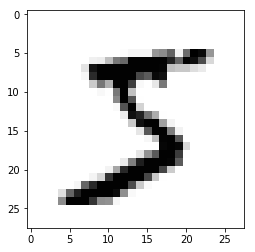

In [51]:
plot.imshow(img_array, cmap='Greys')

(28, 28)


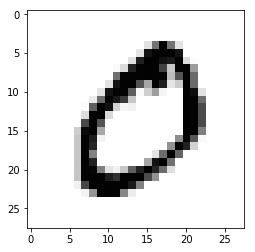

In [54]:
all_values= data_list[1].split(',')
img_array= np.asfarray(all_values[1:]).reshape((28,28))
print(img_array.shape)
plot.imshow(img_array, cmap='Greys')

In [56]:
# scaled input和非scaled效果是一样哒
scaled_input= (np.asfarray(all_values[1:])/255*0.99)+0.01
print(scaled_input)

[ 0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.

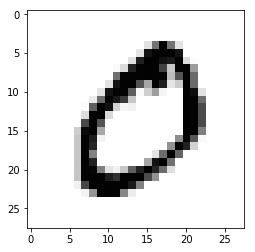

In [59]:
#scaled_input.reshape(28,28)
plot.imshow(scaled_input.reshape(28,28), cmap="Greys")

In [71]:
input_nodes=784
hidden_nodes=100
output_nodes=10

learning_rate=0.3
n= neuralNetwork(input_nodes, hidden_nodes, output_nodes,learning_rate)

In [72]:
for record in date_list:
    all_values= record.split(',')
    inputs=(np.asfarray(all_values[1:])/255*0.99)+0.01
    targets=np.zeros(output_nodes)+0.01
    targets[int(all_values[0])]=0.99
    n.train(inputs, targets)

In [73]:
with open('mnist_test_10.csv') as f:
    test_data= f.readlines()

In [74]:
all_values= test_data[0].split(',')
print(all_values[0])

7


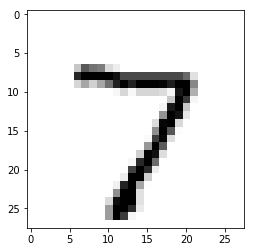

In [75]:
img_array= np.asfarray(all_values[1:]).reshape(28,28)
plot.imshow(img_array, cmap="Greys")

In [77]:
n.query(np.asfarray(all_values[1:]))

array([[ 0.01956649],
       [ 0.01418903],
       [ 0.10708489],
       [ 0.09304496],
       [ 0.05500892],
       [ 0.01714134],
       [ 0.00258944],
       [ 0.64980971],
       [ 0.10843634],
       [ 0.03501819]])

In [39]:
class neuralNetwork:
    #initialisieren的时候需要的东西：每层点的个数，lr，activationFunction和最初的层之间的w
    def __init__(self,inputNodes,hiddenNodes,outputNodes,learningRate):
        self.iNodes= inputNodes
        self.hNodes= hiddenNodes
        self.oNodes= outputNodes
        self.lr= learningRate
        self.wih= np.random.rand(self.hNodes, self.iNodes)-0.5
        self.who= np.random.rand(self.oNodes, self.hNodes)-0.5
        self.activationFunction= lambda x: sci.expit(x)
        pass
    
    def train(self,input_list, target_list):
        inputs= np.array(input_list,ndmin=2).T
        hidden_inputs= np.dot(self.wih,inputs)
        hidden_outputs= self.activationFunction(hidden_inputs)
        final_inputs= np.dot(self.who,hidden_outputs)
        final_outputs= self.activationFunction(final_inputs)
        
        targets= np.array(target_list, ndmin=2).T
        final_error= targets-final_outputs
        hidden_error= np.dot(self.who.T, final_error)
        self.who += self.lr* np.dot(final_error*final_outputs*(1-final_outputs),np.transpose(hidden_outputs))
        self.wih += self.lr* np.dot(hidden_error*(hidden_outputs)*(1-hidden_outputs), np.transpose(inputs))
        pass
    
    def query(self, input_list):
        inputs= np.array(input_list, ndmin=2).T
        hidden_inputs= np.dot(self.wih,inputs)
        hidden_outputs= self.activationFunction(hidden_inputs)
        final_inputs= np.dot(self.who, hidden_outputs)
        final_outputs= self.activationFunction(final_inputs)
        return final_outputs
    

In [17]:
with open('mnist_train_100.csv') as f:
    train_data= f.readlines()
with open('mnist_test_10.csv') as f:
    test_data= f.readlines()


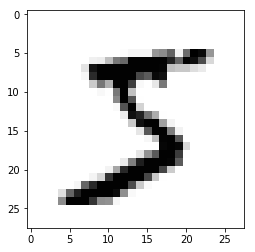

In [18]:
allValues= train_data[0].split(',')
m= np.asfarray(allValues[1:]).reshape(28,28)
plot.imshow(m, cmap="Greys")

In [61]:
n= neuralNetwork(784,100,10,0.3)

In [62]:
for i in range(len(train_data)):
    allValues= train_data[i].split(',')
    inputs= np.asfarray(allValues[1:])/255*0.99+0.01
    targets= np.zeros(10)+0.01
    targets[int(allValues[0])]=0.99
    n.train(inputs, targets)

In [63]:
testAll= test_data[0].split(',')
print(testAll[0])
n.query(np.asfarray(testAll[1:]))

7


array([[ 0.017536  ],
       [ 0.00392541],
       [ 0.18650368],
       [ 0.30520042],
       [ 0.34766052],
       [ 0.09699311],
       [ 0.00483936],
       [ 0.86264844],
       [ 0.01643613],
       [ 0.14878234]])

In [65]:
scoreCard=[]
for record in test_data:
    allValues= record.split(',')
    inputs= np.asfarray(allValues[1:])/255*0.99+0.01
    outputs= n.query(inputs)
    label= np.argmax(outputs)
    correct_label=int(allValues[0])
    print(correct_label,"correct label")
    print(label, "network's answer")
    if(label==correct_label):
        scoreCard.append(1)
    else:
        scoreCard.append(0)
    pass
            
    

7 correct label
7 network's answer
2 correct label
3 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
9 correct label
4 network's answer
5 correct label
4 network's answer
9 correct label
4 network's answer


In [66]:
scoreCard

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]